### 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- 피쳐 : Length, Height, Width
- 타겟 : Weight
- [조건]
    * 특성 추가 => degree = 5로 설정
    * 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [16]:
import pandas as pd
import numpy as np

In [17]:
data = '../data/perch3.csv'
perchDF = pd.read_csv(data)
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [18]:
featureDF = perchDF[perchDF.columns[1:]]
targetSR = perchDF[perchDF.columns[0]]

In [19]:
print(f'featureDF : {featureDF.shape}, targetSR : {targetSR.shape}')

featureDF : (56, 3), targetSR : (56,)


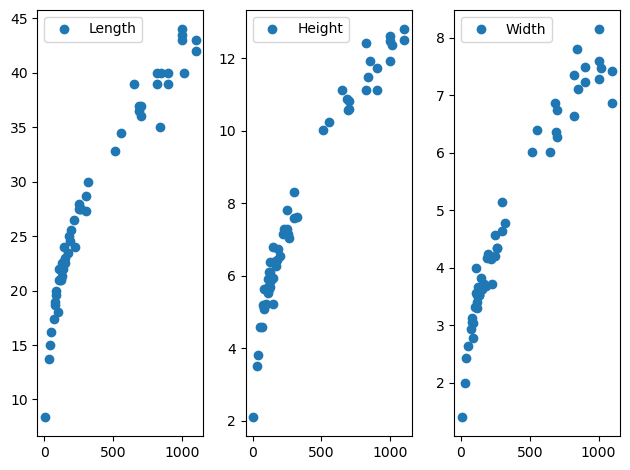

In [27]:
import matplotlib.pyplot as plt

# Feature & Target 관계
for nIdx in range(1,4):
    plt.subplot(1,3,nIdx)
    plt.plot(targetSR, featureDF[featureDF.columns[nIdx-1]], 'o', label=featureDF.columns[nIdx-1])
    plt.legend()
    
plt.tight_layout()
plt.show()

# 직선의 형태는 아니지만 곡선의 양의 방향/비례하는 분포 확인

[3] 데이터 가공 <hr>
- 특성 추가
- 특성 스케일링

[3-1] 특성 추가

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(featureDF)

poly_feature = poly.transform(featureDF)
poly_feature.shape

(56, 55)

In [32]:
print(f'특성 추가 => {poly_feature.shape}\n{poly.feature_names_in_} => {poly.get_feature_names_out()}')

특성 추가 => (56, 55)
['Length' 'Height' 'Width'] => ['Length' 'Height' 'Width' 'Length^2' 'Length Height' 'Length Width'
 'Height^2' 'Height Width' 'Width^2' 'Length^3' 'Length^2 Height'
 'Length^2 Width' 'Length Height^2' 'Length Height Width' 'Length Width^2'
 'Height^3' 'Height^2 Width' 'Height Width^2' 'Width^3' 'Length^4'
 'Length^3 Height' 'Length^3 Width' 'Length^2 Height^2'
 'Length^2 Height Width' 'Length^2 Width^2' 'Length Height^3'
 'Length Height^2 Width' 'Length Height Width^2' 'Length Width^3'
 'Height^4' 'Height^3 Width' 'Height^2 Width^2' 'Height Width^3' 'Width^4'
 'Length^5' 'Length^4 Height' 'Length^4 Width' 'Length^3 Height^2'
 'Length^3 Height Width' 'Length^3 Width^2' 'Length^2 Height^3'
 'Length^2 Height^2 Width' 'Length^2 Height Width^2' 'Length^2 Width^3'
 'Length Height^4' 'Length Height^3 Width' 'Length Height^2 Width^2'
 'Length Height Width^3' 'Length Width^4' 'Height^5' 'Height^4 Width'
 'Height^3 Width^2' 'Height^2 Width^3' 'Height Width^4' 'Width^5']


[3-2] 피쳐 스케일링

- 훈련용 & 테스트용 분리

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_feature,
                                                   targetSR,
                                                   random_state=5)

In [36]:
print(f'Train : {X_train.shape}, {y_train.shape} Test : {X_test.shape}, {y_test.shape}')

Train : (42, 55), (42,) Test : (14, 55), (14,)


- 스케일링 진행

In [37]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [38]:
scaled_X_train = std_scaler.transform(X_train)
scaled_X_test = std_scaler.transform(X_test)

[4] 학습 진행 => 회귀

In [39]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [41]:
train_score = lr_model.score(scaled_X_train, y_train)
test_score = lr_model.score(scaled_X_test, y_test)

print(f'Train_score: {train_score}, Test_score: {test_score}')

Train_score: 1.0, Test_score: -38.767868061603046


### 규제 : 가중치 값을 조절해서 과대적합 문제 해결
- Ridge : 모든 피쳐에 가중치를 0에 가깝게 조절
- Lasso : 특정 피쳐의 가중치를 0으로 해서 차원 축소 부여

- [규제 1] Ridge

In [42]:
from sklearn.linear_model import Ridge

In [48]:
ridge_model = Ridge(max_iter=100)
ridge_model.fit(scaled_X_train, y_train)

Ridge(max_iter=100)

In [49]:
train_score = ridge_model.score(scaled_X_train, y_train)
test_score = ridge_model.score(scaled_X_test, y_test)

print(f'[Ridge Model] Train_score: {train_score}, Test_score: {test_score}')

[Ridge Model] Train_score: 0.9874355208005008, Test_score: 0.9914491207423642


In [50]:
# 모델 파라미터
print(ridge_model.n_iter_, ridge_model.coef_, ridge_model.intercept_)

None [ 1.83176874e+00 -7.23677789e+00  1.03067055e+01  1.57775249e+01
  1.18446480e+01  1.67466597e+01  9.57952490e+00  1.47797173e+01
  2.48615142e+01  1.85163425e+01  1.67577526e+01  1.46142404e+01
  1.58382863e+01  1.38108100e+01  1.64490445e+01  1.56379186e+01
  1.39352928e+01  1.71480760e+01  2.50779150e+01  1.42694832e+01
  1.39921892e+01  6.23690826e+00  1.41806030e+01  6.32646330e+00
  2.93976268e+00  1.47629117e+01  7.00986521e+00  3.97399179e+00
  5.70584401e+00  1.56796396e+01  8.23737024e+00  5.75159002e+00
  8.24469917e+00  1.54675618e+01  5.86439125e+00  6.81074624e+00
 -5.88111799e+00  8.02129126e+00 -4.97701429e+00 -1.36851639e+01
  9.44134707e+00 -3.67900627e+00 -1.22792895e+01 -1.61590708e+01
  1.10232306e+01 -2.01766706e+00 -1.03096090e+01 -1.36546600e+01
 -1.21067571e+01  1.27255386e+01 -1.99919223e-02 -7.79070771e+00
 -1.04001988e+01 -7.93557014e+00 -7.20881695e-01] 365.6404761904762


In [51]:
# ====> 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1., 10., 20., 30.]
ridge_score=[[], []]

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(scaled_X_train, y_train)
    train_score = ridge_model.score(scaled_X_train, y_train)
    test_score = ridge_model.score(scaled_X_test, y_test)
    
    ridge_score[0].append(train_score)
    ridge_score[1].append(test_score)
    

In [55]:
# 테스트 점수가 가장 높은 알파값
best_alpha = alphas[ridge_score[1].index(max(ridge_score[1]))]
best_alpha

1.0

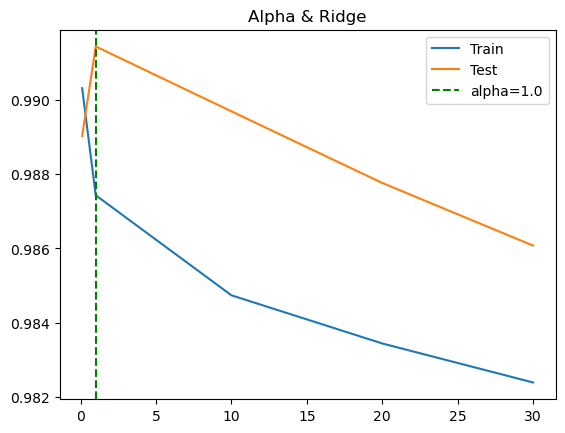

In [58]:
# 학습 및 테스트 점수 기반 시각화
import matplotlib.pyplot as plt

plt.plot(alphas, ridge_score[0], label='Train')
plt.plot(alphas, ridge_score[1], label='Test')
plt.axvline(best_alpha, linestyle='--', color='green', label=f'alpha={best_alpha}')
plt.title('Alpha & Ridge')
plt.legend()
plt.show()

[규제 2] Lasso

In [59]:
from sklearn.linear_model import Lasso

In [60]:
lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [61]:
train_score = lasso_model.score(scaled_X_train, y_train)
test_score = lasso_model.score(scaled_X_test, y_test)

print(f'[Lasso Model] Train_score: {train_score}, Test_score: {test_score}')

[Lasso Model] Train_score: 0.9865761752892273, Test_score: 0.9912639062921962


In [62]:
# 모델 파라미터
print(lasso_model.n_iter_, lasso_model.coef_, lasso_model.intercept_)

1000 [ 0.          0.          0.          8.39678696  0.          0.
 13.70952971  0.         87.23199451 91.06954235 16.61716411  0.
 35.69479723  0.          0.         46.93195311  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         41.8984421
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.        ] 365.6404761904762


In [66]:
# ====> 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1., 10., 20., 30.]
lasso_score=[[], []]

for a in alphas:
    lasso_model = Lasso(alpha=a, max_iter=30000)
    lasso_model.fit(scaled_X_train, y_train)
    train_score = lasso_model.score(scaled_X_train, y_train)
    test_score = lasso_model.score(scaled_X_test, y_test)
    
    lasso_score[0].append(train_score)
    lasso_score[1].append(test_score)
    

In [67]:
# 테스트 점수가 가장 높은 알파값
best_alpha = alphas[lasso_score[1].index(max(lasso_score[1]))]
best_alpha

1.0

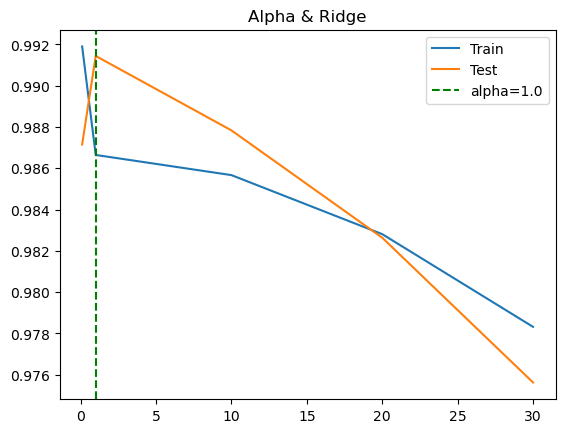

In [68]:
# 학습 및 테스트 점수 기반 시각화
import matplotlib.pyplot as plt

plt.plot(alphas, lasso_score[0], label='Train')
plt.plot(alphas, lasso_score[1], label='Test')
plt.axvline(best_alpha, linestyle='--', color='green', label=f'alpha={best_alpha}')
plt.title('Alpha & Ridge')
plt.legend()
plt.show()